In [ ]:
#importing necessary packages and the data set
import pandas as pd
import numpy as np

data=pd.read_excel("data.xlsx")
#Seprating dependent variable from independent variables
X=data.iloc[:,0:8]
Y=data["Outcome"]

In [ ]:
# Splitting the X and Y into the Training set and Testing set
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, Y, test_size = 0.2, random_state = 50,shuffle=True)

In [ ]:
from sklearn.cluster import KMeans
# Initialize K-means algorithm with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)

# Fit K-means to the training data
kmeans.fit(X_train)

# Predict cluster assignments for the test data
y_pred = kmeans.predict(X_test)

# Map predicted cluster assignments to binary labels
y_pred_binary = np.zeros_like(y_pred)
y_pred_binary[np.where(y_pred == np.argmax(np.bincount(y_train)))] = 1

from sklearn.metrics import classification_report
print(classification_report(y_pred_binary,y_test))



              precision    recall  f1-score   support

           0       0.87      0.69      0.77       122
           1       0.33      0.59      0.43        32

    accuracy                           0.67       154
   macro avg       0.60      0.64      0.60       154
weighted avg       0.76      0.67      0.70       154



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


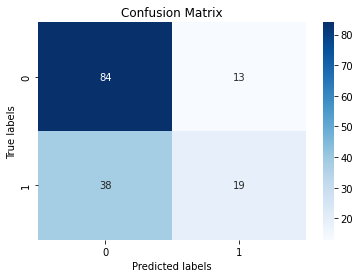

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
# Calculate confusion matrix to evaluate performance
confusion = confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix as heatmap
ax = plt.subplot()
sns.heatmap(confusion, annot=True, ax=ax, cmap="Blues")

# Add labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])
plt.show()